In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('batch2data_v2.xlsx')
df

,scenarioID [],i [],V [V],wireGauge [],turns [],radius [m],wireGauge_car [],turns_car [],radius_car [m],height [m],spacing [m],velocity [m/s],totalCharge [C],cost [$],cost/charge [$/C]
0,1,1,100,6,410,1,8,230,1.5,0.15,0.00,30,2159.103049,1.959868e+06,907.723375
1,8193,1025,100,6,410,1,8,230,1.5,0.15,0.18,30,2018.012000,1.798044e+06,890.997832
2,16385,2049,100,6,410,1,8,230,1.5,0.15,0.36,30,2151.951000,1.660905e+06,771.813738
3,4097,513,100,6,410,1,8,230,1.5,0.30,0.00,30,1575.001000,1.959868e+06,1244.360039
4,12289,1537,100,6,410,1,8,230,1.5,0.30,0.18,30,1761.204000,1.798044e+06,1020.917689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,12288,1536,600,8,560,4,12,320,2.1,0.15,0.18,30,504.273500,1.898218e+06,3764.261974
24572,20480,2560,600,8,560,4,12,320,2.1,0.15,0.36,30,457.610400,1.857347e+06,4058.795097
24573,8192,1024,600,8,560,4,12,320,2.1,0.30,0.00,30,500.735200,1.940927e+06,3876.155413
24574,16384,2048,600,8,560,4,12,320,2.1,0.30,0.18,30,474.296000,1.898218e+06,4002.179147


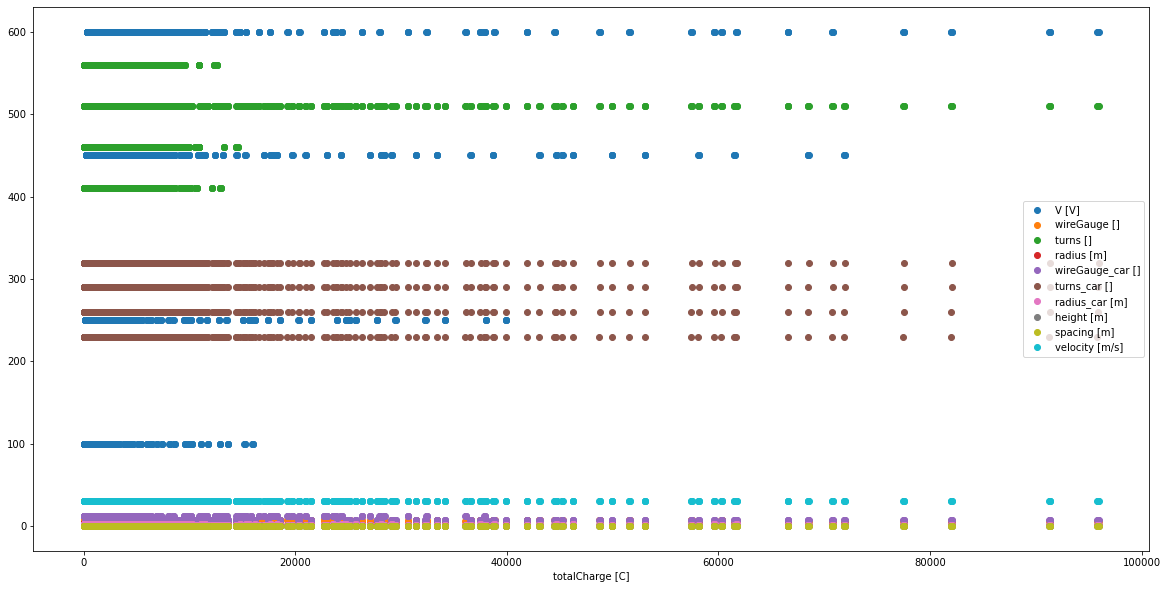

In [3]:
df.plot(y=['V [V]', 'wireGauge []', 'turns []', 'radius [m]', 'wireGauge_car []',
       'turns_car []', 'radius_car [m]', 'height [m]', 'spacing [m]', 'velocity [m/s]'], x ='totalCharge [C]', style='o',figsize=(20,10))

In [4]:
voltage = [100, 250, 450, 600]
wireGauge = [6,8]
turns = [410,460,510,560]
radius = [1,2,3,4]
wireGauge_car = [8,12]
turns_car = [230,260,290,320]
radius_car = [1.5,1.7,1.9,2.1]
height = [.15,.3]
spacing = [.18,.36]
velocity = [30]

Text(0, 0.5, 'Cost/Charge [$/C]')

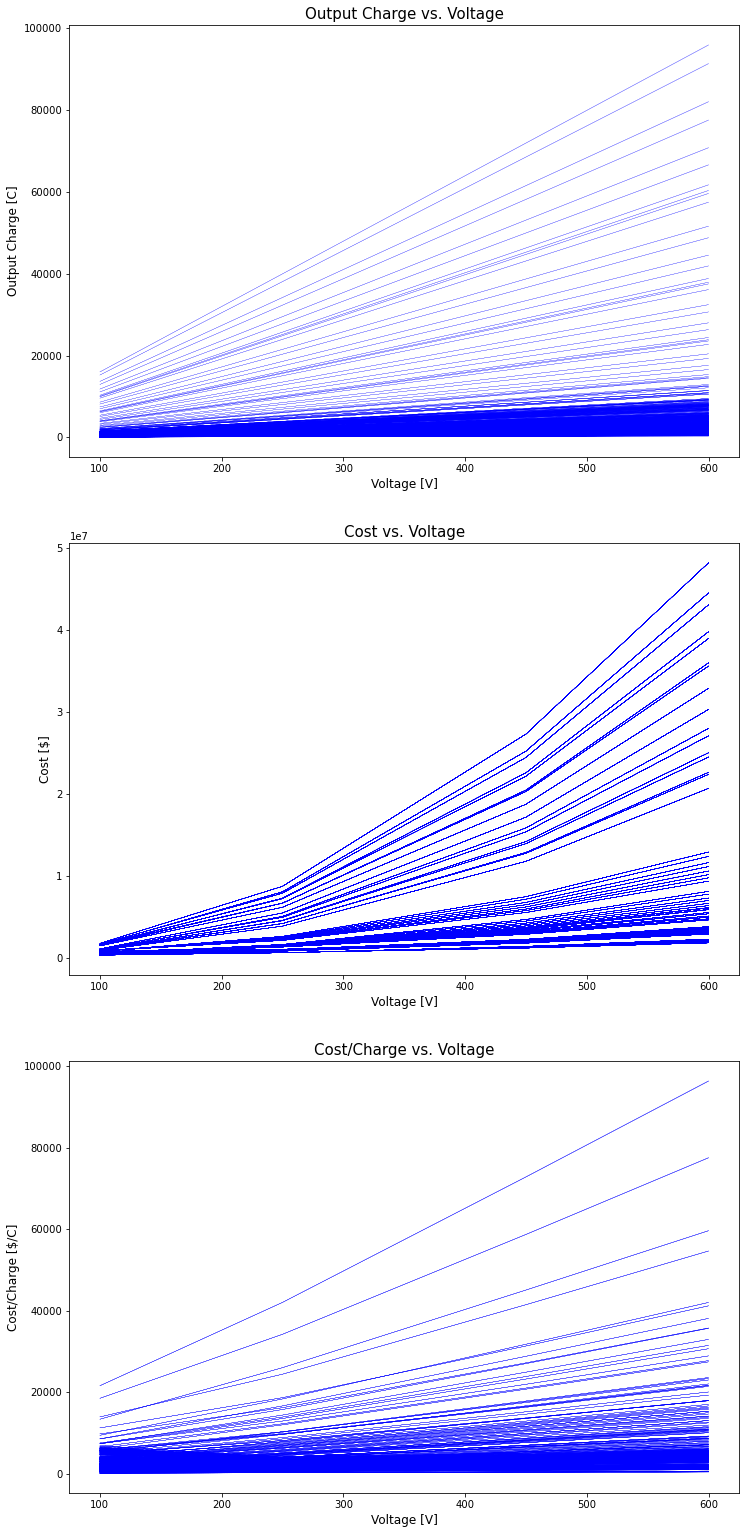

In [6]:
# voltage
fig, axs = plt.subplots(3,figsize=(12,27))
for wg in wireGauge:
    for t in turns:
          for r in radius:
                for wg_c in wireGauge_car:
                      for t_c in turns_car:
                              for r_c in radius_car:
                                    for h in height:
                                          for s in spacing:
                                                rows = df.loc[(df['wireGauge []'] == wg) & 
                                                      (df['turns []'] == t) &
                                                      (df['radius [m]'] == r) &
                                                      (df['wireGauge_car []'] == wg_c) &
                                                      (df['turns_car []'] == t_c) &
                                                      (df['radius_car [m]'] == r_c) &
                                                      (df['height [m]'] == h) &
                                                      (df['spacing [m]'] == s)]
                                                v = rows['V [V]'] 
                                                charge = rows['totalCharge [C]']
                                                cost = rows['cost [$]']
                                                cost_charge = rows['cost/charge [$/C]']
                                                axs[0].plot(v, charge ,linewidth=0.1, color = 'blue')
                                                axs[1].plot(v, cost ,linewidth=0.1, color = 'blue')
                                                axs[2].plot(v, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Voltage",fontsize = 15)
axs[0].set_xlabel('Voltage [V]', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Voltage",fontsize = 15)
axs[1].set_xlabel("Voltage [V]",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Voltage", fontsize = 15)
axs[2].set_xlabel("Voltage [V]",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

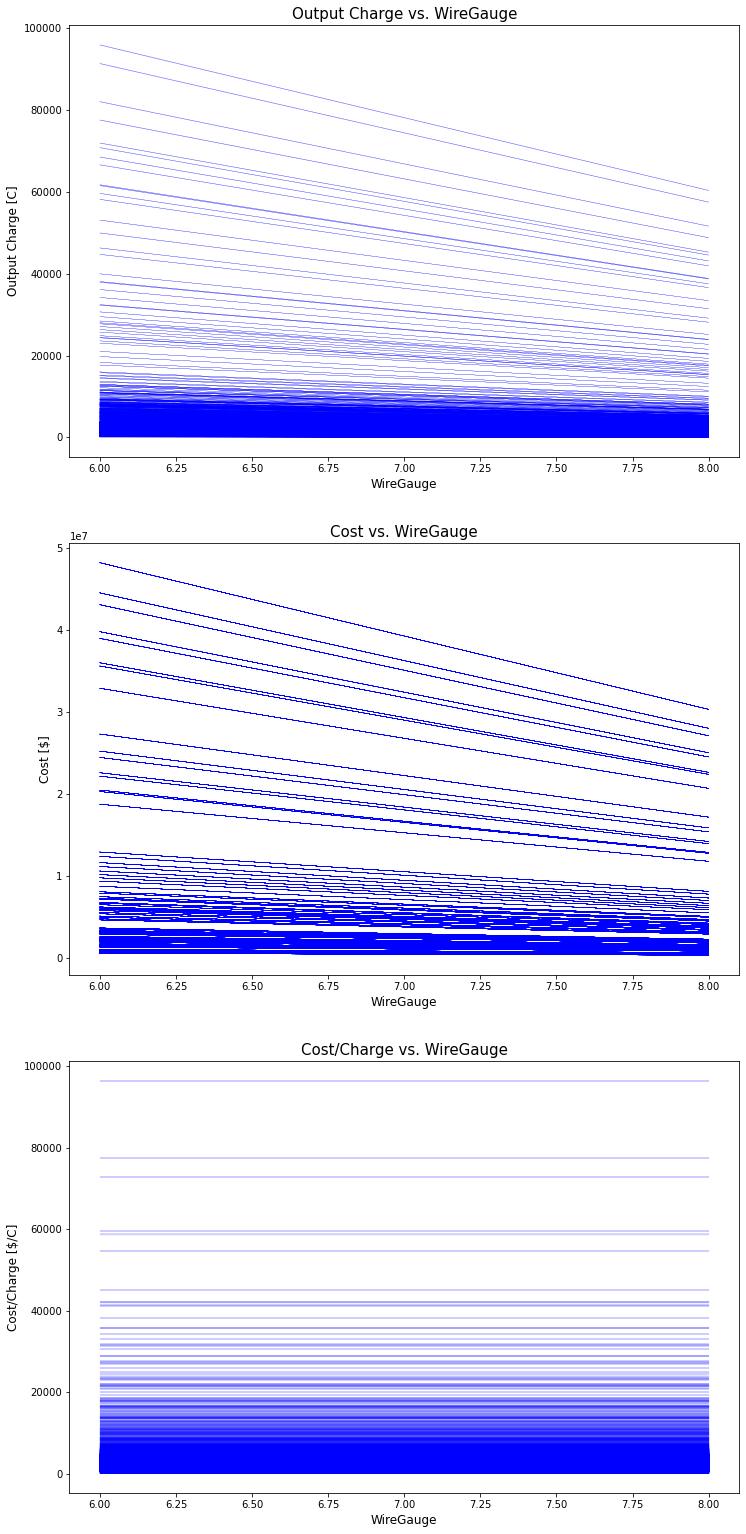

In [5]:
# wire gauge
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for t in turns:
          for r in radius:
                for wg_c in wireGauge_car:
                      for t_c in turns_car:
                          for r_c in radius_car:
                                for h in height:
                                      for s in spacing:
                                            rows = df.loc[(df['V [V]'] == v) & 
                                                  (df['turns []'] == t) &
                                                  (df['radius [m]'] == r) &
                                                  (df['wireGauge_car []'] == wg_c) &
                                                  (df['turns_car []'] == t_c) &
                                                  (df['radius_car [m]'] == r_c) &
                                                  (df['height [m]'] == h) &
                                                  (df['spacing [m]'] == s)]
                                            w = rows['wireGauge []'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. WireGauge",fontsize = 15)
axs[0].set_xlabel('WireGauge', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. WireGauge",fontsize = 15)
axs[1].set_xlabel("WireGauge",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. WireGauge", fontsize = 15)
axs[2].set_xlabel("WireGauge",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

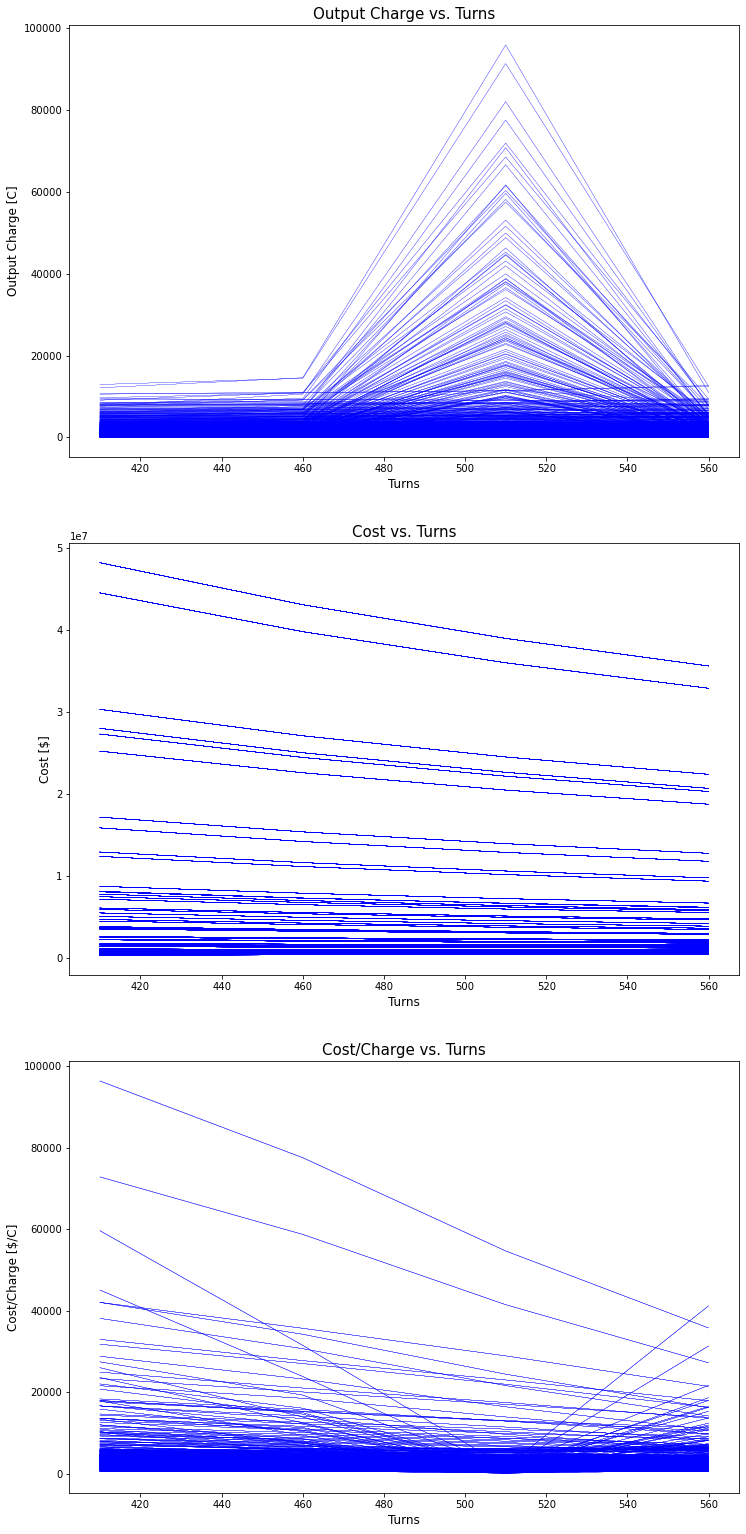

In [6]:
# turns
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for r in radius:
                for wg_c in wireGauge_car:
                      for t_c in turns_car:
                              for r_c in radius_car:
                                    for h in height:
                                          for s in spacing:
                                                rows = df.loc[
                                                      (df['V [V]'] == v) & 
                                                      (df['wireGauge []'] == wg) &
                                                      (df['radius [m]'] == r) &
                                                      (df['wireGauge_car []'] == wg_c) &
                                                      (df['turns_car []'] == t_c) &
                                                      (df['radius_car [m]'] == r_c) &
                                                      (df['height [m]'] == h) &
                                                      (df['spacing [m]'] == s)]
                                                w = rows['turns []'] 
                                                charge = rows['totalCharge [C]']
                                                cost = rows['cost [$]']
                                                cost_charge = rows['cost/charge [$/C]']
                                                axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                                axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                                axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Turns",fontsize = 15)
axs[0].set_xlabel('Turns', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Turns",fontsize = 15)
axs[1].set_xlabel("Turns",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Turns", fontsize = 15)
axs[2].set_xlabel("Turns",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

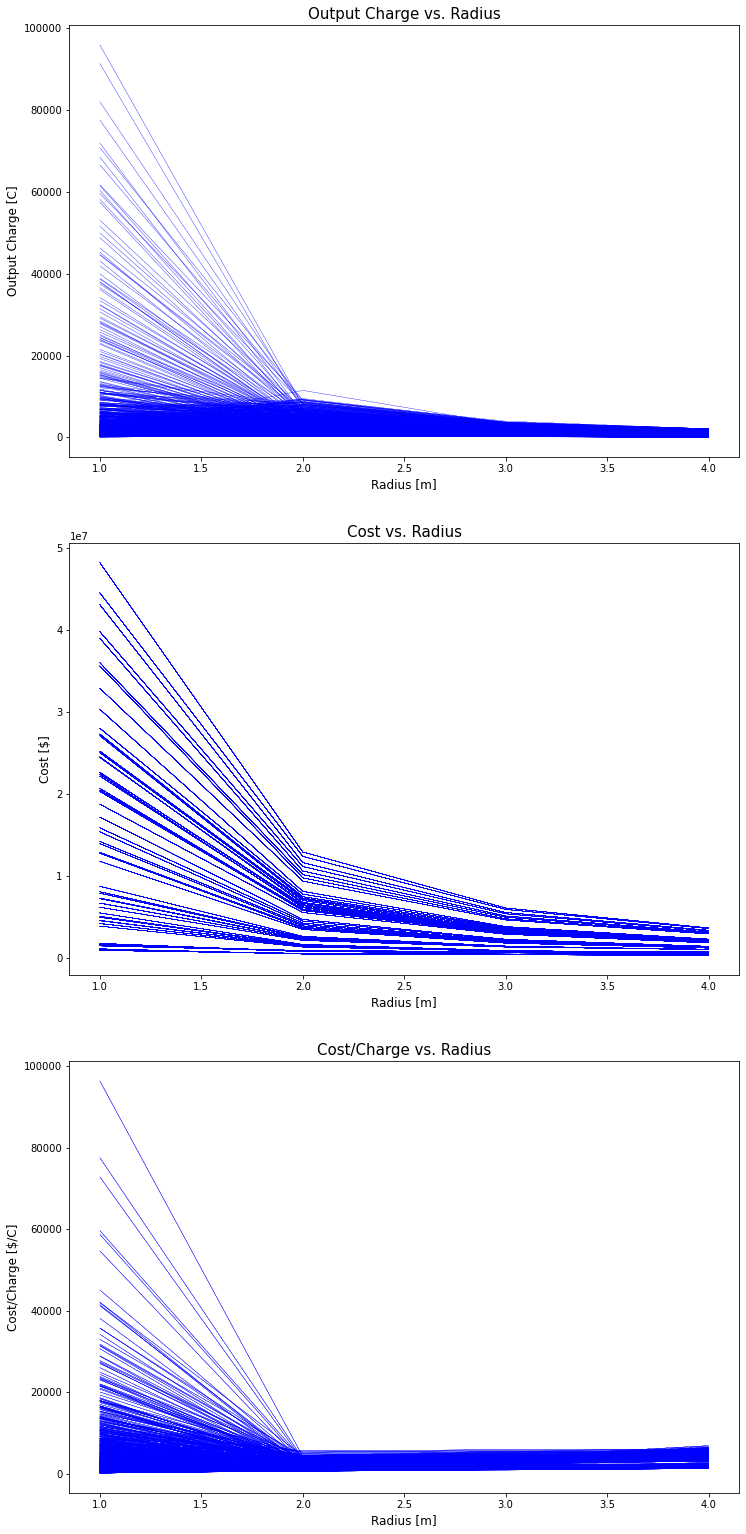

In [9]:
# radius
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for t in turns:
                for wg_c in wireGauge_car:
                      for t_c in turns_car:
                              for r_c in radius_car:
                                for h in height:
                                      for s in spacing:
                                            rows = df.loc[
                                                  (df['V [V]'] == v) & 
                                                  (df['wireGauge []'] == wg) &
                                                  (df['turns []'] == t) &
                                                  (df['wireGauge_car []'] == wg_c) &
                                                  (df['turns_car []'] == t_c) &
                                                  (df['radius_car [m]'] == r_c) &
                                                  (df['height [m]'] == h) &
                                                  (df['spacing [m]'] == s)]
                                            w = rows['radius [m]'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Radius",fontsize = 15)
axs[0].set_xlabel('Radius [m]', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Radius",fontsize = 15)
axs[1].set_xlabel("Radius [m]",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Radius", fontsize = 15)
axs[2].set_xlabel("Radius [m]",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

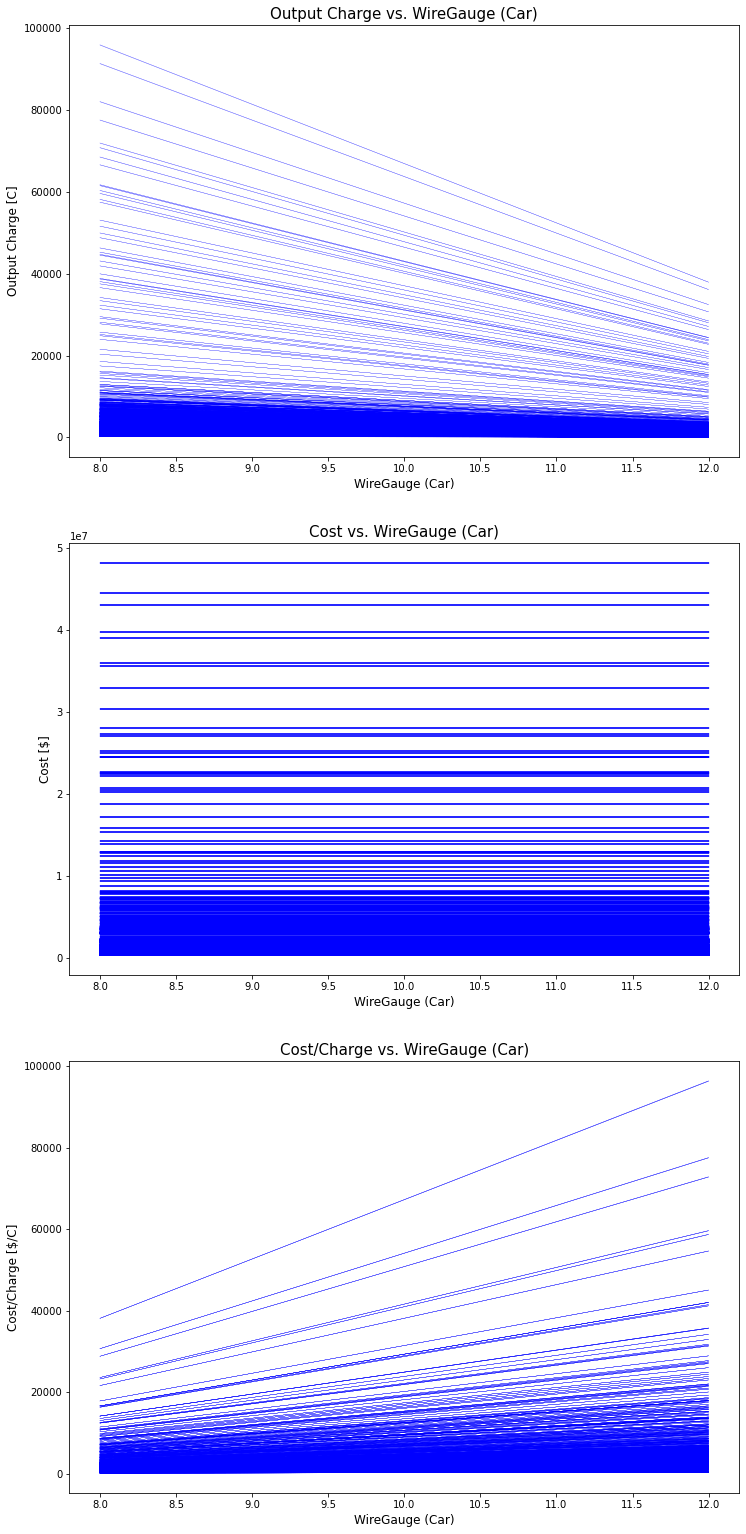

In [10]:
# wire gauge (car)
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for t in turns:
                for r in radius:
                    for t_c in turns_car:
                          for r_c in radius_car:
                                for h in height:
                                      for s in spacing:
                                            rows = df.loc[
                                                  (df['V [V]'] == v) & 
                                                  (df['wireGauge []'] == wg) &
                                                  (df['turns []'] == t) &
                                                  (df['radius [m]'] == r) &
                                                  (df['turns_car []'] == t_c) &
                                                  (df['radius_car [m]'] == r_c) &
                                                  (df['height [m]'] == h) &
                                                  (df['spacing [m]'] == s)]
                                            w = rows['wireGauge_car []'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. WireGauge (Car)",fontsize = 15)
axs[0].set_xlabel('WireGauge (Car)', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. WireGauge (Car)",fontsize = 15)
axs[1].set_xlabel("WireGauge (Car)",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. WireGauge (Car)", fontsize = 15)
axs[2].set_xlabel("WireGauge (Car)",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

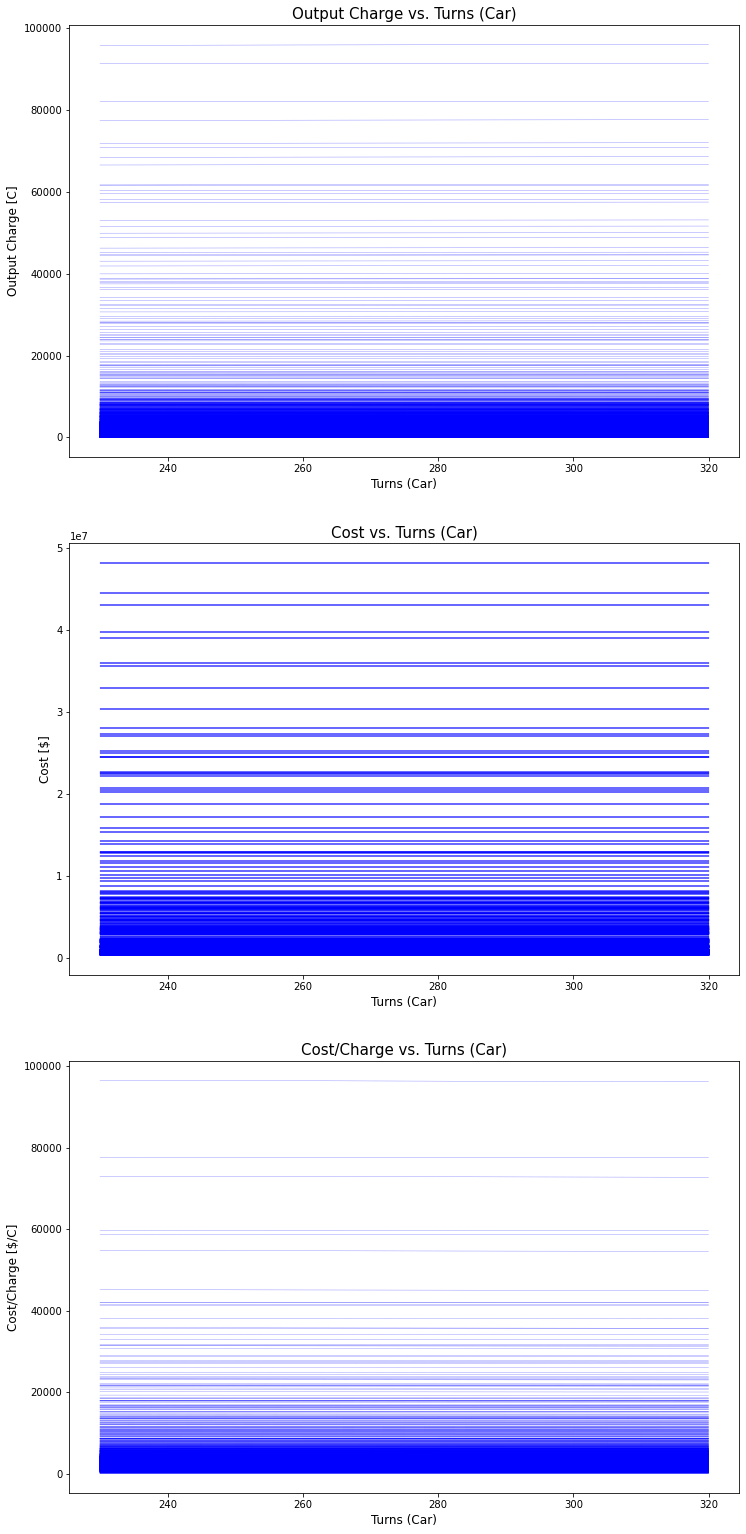

In [11]:
# turns (car)
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for t in turns:
                for r in radius:
                    for wg_c in wireGauge_car:
                          for r_c in radius_car:
                                for h in height:
                                      for s in spacing:
                                            rows = df.loc[
                                                  (df['V [V]'] == v) & 
                                                  (df['wireGauge []'] == wg) &
                                                  (df['turns []'] == t) &
                                                  (df['radius [m]'] == r) &
                                                  (df['wireGauge_car []'] == wg_c) &
                                                  (df['radius_car [m]'] == r_c) &
                                                  (df['height [m]'] == h) &
                                                  (df['spacing [m]'] == s)]
                                            w = rows['turns_car []'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.2, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Turns (Car)",fontsize = 15)
axs[0].set_xlabel('Turns (Car)', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Turns (Car)",fontsize = 15)
axs[1].set_xlabel("Turns (Car)",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Turns (Car)", fontsize = 15)
axs[2].set_xlabel("Turns (Car)",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

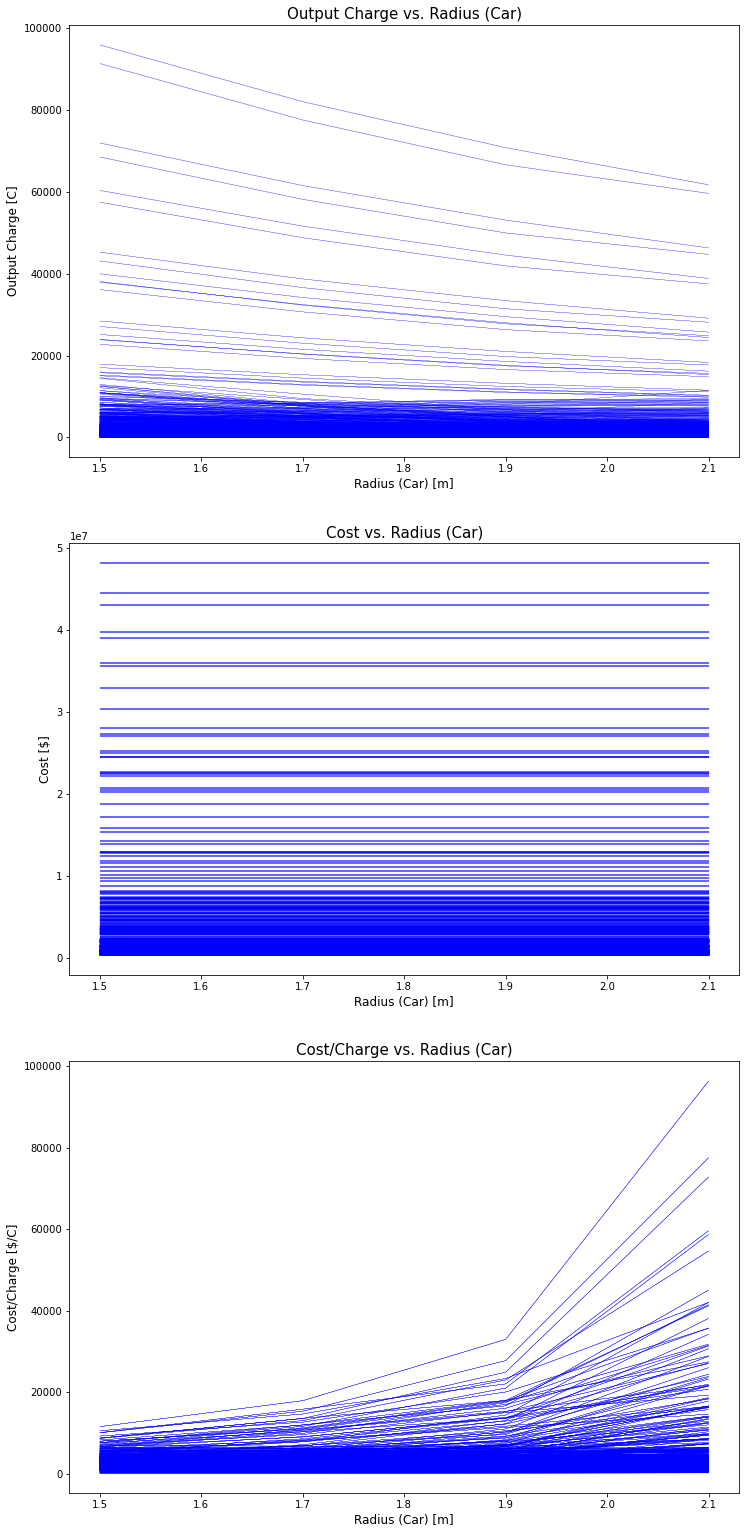

In [13]:
# radius (car)
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for t in turns:
                for r in radius:
                    for wg_c in wireGauge_car:
                          for t_c in turns_car:
                                for h in height:
                                      for s in spacing:
                                            rows = df.loc[
                                                  (df['V [V]'] == v) & 
                                                  (df['wireGauge []'] == wg) &
                                                  (df['turns []'] == t) &
                                                  (df['radius [m]'] == r) &
                                                  (df['wireGauge_car []'] == wg_c) &
                                                  (df['turns_car []'] == t_c)&
                                                  (df['height [m]'] == h) &
                                                  (df['spacing [m]'] == s)]
                                            w = rows['radius_car [m]'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Radius (Car)",fontsize = 15)
axs[0].set_xlabel('Radius (Car) [m]', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Radius (Car)",fontsize = 15)
axs[1].set_xlabel("Radius (Car) [m]",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Radius (Car)", fontsize = 15)
axs[2].set_xlabel("Radius (Car) [m]",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

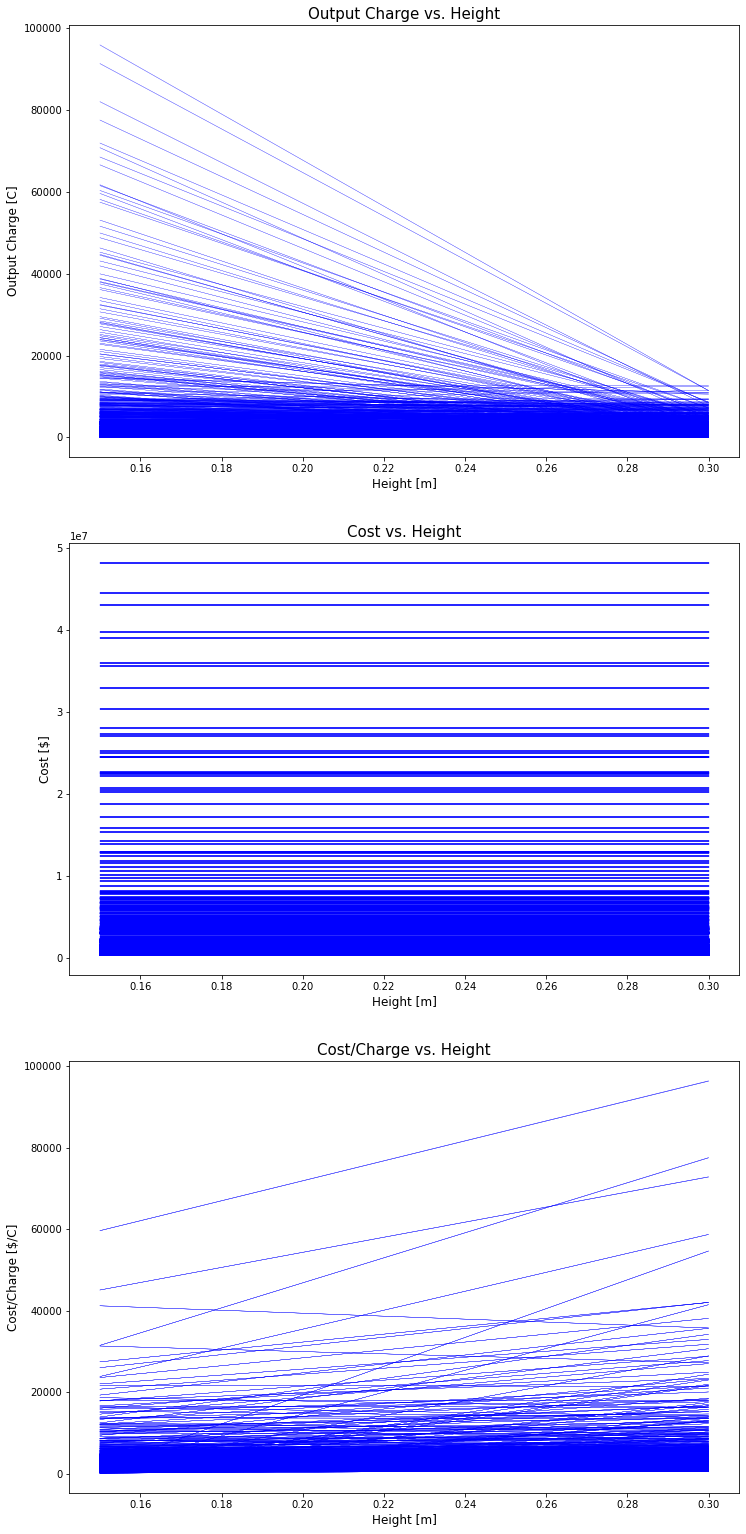

In [14]:
# height
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for t in turns:
                for r in radius:
                    for wg_c in wireGauge_car:
                          for t_c in turns_car:
                                for r_c in radius_car:
                                      for s in spacing:
                                            rows = df.loc[
                                                  (df['V [V]'] == v) & 
                                                  (df['wireGauge []'] == wg) &
                                                  (df['turns []'] == t) &
                                                  (df['radius [m]'] == r) &
                                                  (df['wireGauge_car []'] == wg_c) &
                                                  (df['turns_car []'] == t_c)&
                                                  (df['radius_car [m]'] == r_c) &
                                                  (df['spacing [m]'] == s)]
                                            w = rows['height [m]'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Height",fontsize = 15)
axs[0].set_xlabel('Height [m]', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Height",fontsize = 15)
axs[1].set_xlabel("Height [m]",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Height", fontsize = 15)
axs[2].set_xlabel("Height [m]",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)

Text(0, 0.5, 'Cost/Charge [$/C]')

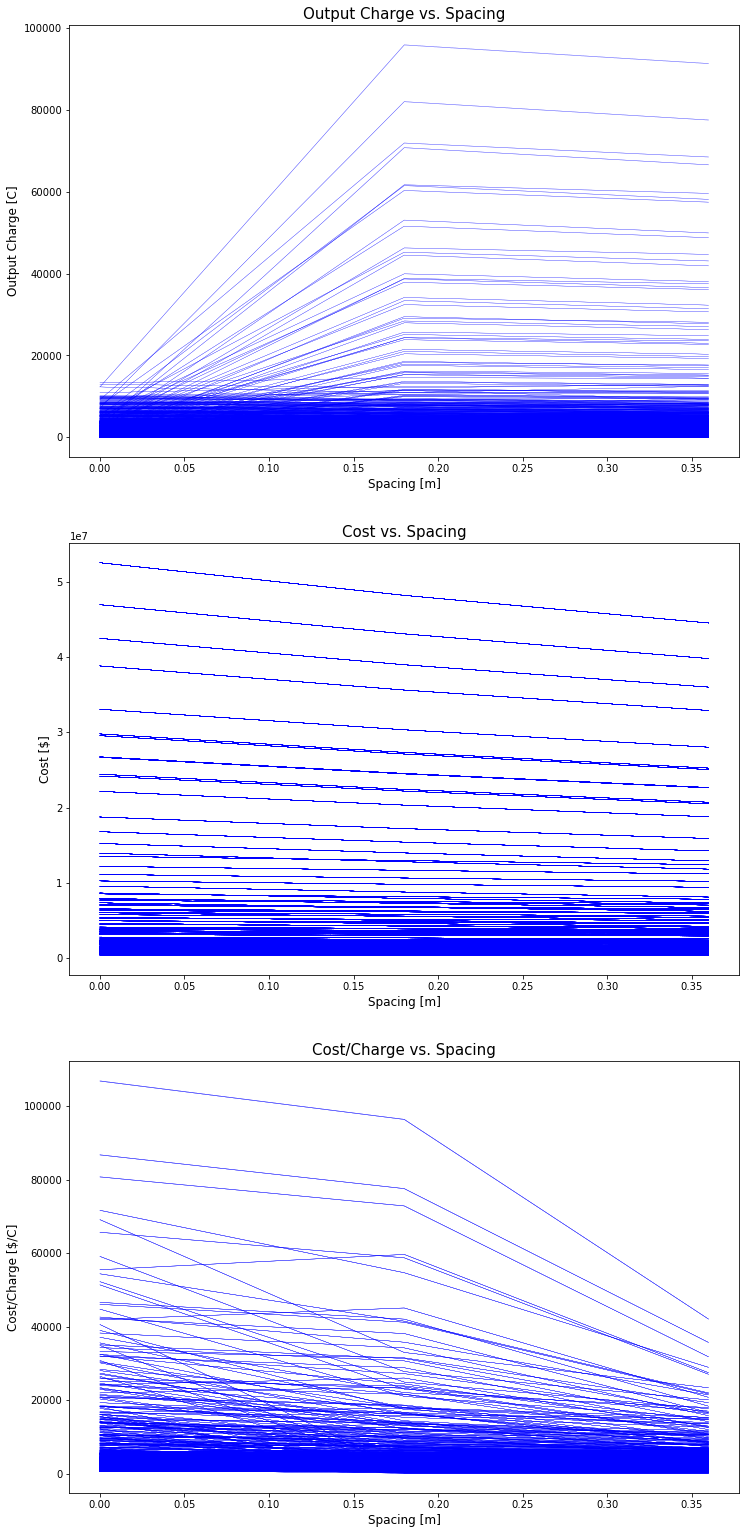

In [15]:
# spacing
fig, axs = plt.subplots(3,figsize=(12,27))
for v in voltage:
    for wg in wireGauge:
          for t in turns:
                for r in radius:
                    for wg_c in wireGauge_car:
                          for t_c in turns_car:
                                for r_c in radius_car:
                                      for h in height:
                                            rows = df.loc[
                                                  (df['V [V]'] == v) & 
                                                  (df['wireGauge []'] == wg) &
                                                  (df['turns []'] == t) &
                                                  (df['radius [m]'] == r) &
                                                  (df['wireGauge_car []'] == wg_c) &
                                                  (df['turns_car []'] == t_c)&
                                                  (df['radius_car [m]'] == r_c) &
                                                  (df['height [m]'] == h)]
                                            w = rows['spacing [m]'] 
                                            charge = rows['totalCharge [C]']
                                            cost = rows['cost [$]']
                                            cost_charge = rows['cost/charge [$/C]']
                                            axs[0].plot(w, charge ,linewidth=0.1, color = 'blue')
                                            axs[1].plot(w, cost ,linewidth=0.1, color = 'blue')
                                            axs[2].plot(w, cost_charge ,linewidth=0.1, color = 'blue')

axs[0].set_title("Output Charge vs. Spacing",fontsize = 15)
axs[0].set_xlabel('Spacing [m]', fontsize = 12)
axs[0].set_ylabel("Output Charge [C]", fontsize = 12)

axs[1].set_title("Cost vs. Spacing",fontsize = 15)
axs[1].set_xlabel("Spacing [m]",  fontsize = 12)
axs[1].set_ylabel("Cost [$]", fontsize = 12)

axs[2].set_title("Cost/Charge vs. Spacing", fontsize = 15)
axs[2].set_xlabel("Spacing [m]",  fontsize = 12)
axs[2].set_ylabel ("Cost/Charge [$/C]",  fontsize = 12)